In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#Column descriptions for reference
#id - unique identified for a house
#dateDate - house was sold
#pricePrice - is prediction target
#bedroomsNumber - of Bedrooms/House
#bathroomsNumber - of bathrooms/bedrooms
#sqft_livingsquare - footage of the home
#sqft_lotsquare - footage of the lot
#floorsTotal - floors (levels) in house
#waterfront - House which has a view to a waterfront
#view - Has been viewed/ how many times viewed?
#condition - How good the condition is ( Overall )
#grade - overall grade given to the housing unit, based on King County grading system
#sqft_above - square footage of house apart from basement
#sqft_basement - square footage of the basement
#yr_built - Built Year
#yr_renovated - Year when house was renovated
#zipcode - zip
#lat - Latitude coordinate
#long - Longitude coordinate
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Looking at the dataset ##

In [5]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [6]:
display(data.info())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Dropping Values & Editing Columns##


#### Looking to see which will become my variables. First dropping any null data since it doesn't seem to affect the data frame. Then looking at other columns and seeing how they fit.####

In [7]:
data = data.dropna()
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [8]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
id               15762 non-null int64
date             15762 non-null object
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null float64
condition        15762 non-null int64
grade            15762 non-null int64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null object
yr_built         15762 non-null int64
yr_renovated     15762 non-null float64
zipcode          15762 non-null int64
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 2.6+ MB


In [9]:
display(data['waterfront'].value_counts())
display(data['view'].value_counts())
display(data['sqft_basement'].value_counts())
display(data['yr_renovated'].value_counts())

0.0    15642
1.0      120
Name: waterfront, dtype: int64

0.0    14241
2.0      688
3.0      348
1.0      245
4.0      240
Name: view, dtype: int64

0.0       9362
?          333
600.0      155
500.0      151
700.0      148
          ... 
861.0        1
2250.0       1
3500.0       1
1024.0       1
1481.0       1
Name: sqft_basement, Length: 283, dtype: int64

0.0       15111
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1974.0        1
1959.0        1
1934.0        1
1944.0        1
1976.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [10]:
data = data.drop(columns =['waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated'])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,1951,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1987,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,3,11,2001,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,3,7,1995,98003,47.3097,-122.327,2238,6819


In [11]:
#sorting by date
data = data.sort_values(by = 'date', ascending =False)
display(data.head())
display(data.tail())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
4542,7201800300,9/9/2014,397500.0,3,1.75,1300,8480,1.0,3,7,1969,98052,47.6991,-122.130,1740,7280
7888,5470100220,9/9/2014,222000.0,3,1.50,1310,9273,1.0,4,7,1968,98042,47.3683,-122.147,1710,9600
14566,9528104910,9/9/2014,796000.0,4,3.25,2110,3000,2.0,3,8,2001,98115,47.6769,-122.328,1780,4000
3240,7334501250,9/9/2014,325000.0,3,2.50,1870,9825,1.0,4,7,1994,98045,47.4639,-121.744,1380,11475
13684,3343301490,9/9/2014,818500.0,5,3.50,4790,12957,2.0,3,9,2005,98006,47.5469,-122.194,2620,13538


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
11028,1118001631,1/12/2015,1230000.0,3,2.25,2980,7700,1.0,3,9,1964,98112,47.6336,-122.290,3020,8234
20699,1982201596,1/12/2015,540000.0,3,1.75,1630,1404,2.0,3,8,2014,98107,47.6646,-122.367,1420,1670
11086,3816300105,1/12/2015,435000.0,4,2.50,2060,10125,2.0,4,7,1979,98028,47.7640,-122.262,1760,9876
18679,424069206,1/12/2015,835000.0,4,2.50,2950,48351,2.0,3,10,1986,98075,47.5938,-122.048,2870,34417
12076,5437600140,1/10/2015,325000.0,4,2.50,2240,5105,2.0,4,8,2002,98042,47.3922,-122.165,1920,5288


In [27]:
# Looking at the table a bit more clearly now. 
# Planning on what plots I can look at to see how I can interpret the data.

# order dates 
# see how recent dates are/how many years, difference of info per year
# price vs bedrooms - fix xticks to reduce number 
# price vs zipcode 
# zipcode vs bedrooms
# price vs sqft
# price vs yr_built
# price vs condition

In [12]:
data['date'] = pd.to_datetime(data['date'])

In [13]:
for column in data:
    unique_vals = np.unique(data[column])
    num_values = len(unique_vals)
    if num_values < 20:
        print('The number of values for column {} :{} -- {}'.format(column, num_values, unique_vals))
    else:
        print('The number of values for feature {} : {}'.format(column, num_values))

The number of values for feature id : 15676
The number of values for feature date : 369
The number of values for feature price : 3034
The number of values for column bedrooms :12 -- [ 1  2  3  4  5  6  7  8  9 10 11 33]
The number of values for feature bathrooms : 27
The number of values for feature sqft_living : 912
The number of values for feature sqft_lot : 7927
The number of values for column floors :6 -- [1.  1.5 2.  2.5 3.  3.5]
The number of values for column condition :5 -- [1 2 3 4 5]
The number of values for column grade :11 -- [ 3  4  5  6  7  8  9 10 11 12 13]
The number of values for feature yr_built : 116
The number of values for feature zipcode : 70
The number of values for feature lat : 4747
The number of values for feature long : 728
The number of values for feature sqft_living15 : 694
The number of values for feature sqft_lot15 : 7126


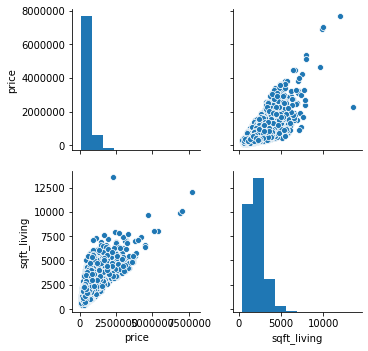

In [14]:
p = sns.pairplot(data[['price', 'sqft_living']])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
id               15762 non-null int64
date             15762 non-null datetime64[ns]
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null float64
condition        15762 non-null int64
grade            15762 non-null int64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null object
yr_built         15762 non-null int64
yr_renovated     15762 non-null float64
zipcode          15762 non-null int64
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

## Refining Data##

#### Looking specifically at houses with max 2 bedrooms 2 bathrooms####

In [15]:
data_bed = data[data['bedrooms'] == 2]
data_bed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 9560 to 15914
Data columns (total 16 columns):
id               2003 non-null int64
date             2003 non-null datetime64[ns]
price            2003 non-null float64
bedrooms         2003 non-null int64
bathrooms        2003 non-null float64
sqft_living      2003 non-null int64
sqft_lot         2003 non-null int64
floors           2003 non-null float64
condition        2003 non-null int64
grade            2003 non-null int64
yr_built         2003 non-null int64
zipcode          2003 non-null int64
lat              2003 non-null float64
long             2003 non-null float64
sqft_living15    2003 non-null int64
sqft_lot15       2003 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(10)
memory usage: 266.0 KB


In [29]:
data_bed_bath = data_bed[data_bed['bathrooms'] <= 2]
data_bed_bath.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 15702 to 15914
Data columns (total 16 columns):
id               1750 non-null int64
date             1750 non-null datetime64[ns]
price            1750 non-null float64
bedrooms         1750 non-null int64
bathrooms        1750 non-null float64
sqft_living      1750 non-null int64
sqft_lot         1750 non-null int64
floors           1750 non-null float64
condition        1750 non-null int64
grade            1750 non-null int64
yr_built         1750 non-null int64
zipcode          1750 non-null int64
lat              1750 non-null float64
long             1750 non-null float64
sqft_living15    1750 non-null int64
sqft_lot15       1750 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(10)
memory usage: 232.4 KB


In [30]:
data_bed_bath = data_bed_bath.sort_values(by = 'price', ascending =False)
data_bed_bath.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
2442,7524900003,2014-12-10,3280000.0,2,1.75,6840,10000,2.5,3,11,2001,98008,47.6042,-122.112,3120,12300
19584,284000025,2015-04-20,1410000.0,2,2.00,2180,18525,1.0,5,9,1952,98146,47.5036,-122.387,2480,21503
9103,7352200100,2015-02-24,1360000.0,2,1.75,2620,14138,2.0,3,8,1931,98125,47.7142,-122.277,1830,8279
4555,9272201250,2015-03-30,1260000.0,2,1.50,2700,7225,1.5,3,8,1910,98116,47.5892,-122.383,2970,5150
9243,7352200025,2014-10-13,1190000.0,2,1.75,2080,8112,1.0,4,8,1939,98125,47.7134,-122.277,2030,8408
5737,1224049005,2014-07-08,1090000.0,2,2.00,2360,11340,1.5,3,9,1997,98040,47.5835,-122.227,3030,11340
2594,8056000075,2014-05-21,1070000.0,2,1.75,1890,9466,2.0,3,8,1987,98004,47.6144,-122.211,2180,12825
21532,8835770330,2014-08-19,1060000.0,2,1.50,2370,184231,2.0,3,11,2005,98045,47.4543,-121.778,3860,151081
8822,3885804225,2014-06-24,1010000.0,2,2.00,1460,9052,1.0,5,6,1900,98033,47.6857,-122.208,2554,7834
13015,9839301165,2014-10-01,998500.0,2,1.00,1570,4400,1.5,4,8,1914,98122,47.6112,-122.293,1850,4400


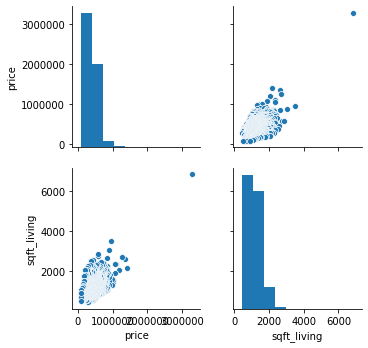

In [31]:
plot = sns.pairplot(data_bed_bath[['price', 'sqft_living']])

#### One outlier shows that the price is much different than anything else within 2014-2015. I am removing that high priced house as it is the only one ####

In [32]:
data_bed_bath = data_bed_bath[data_bed_bath.date != '12/10/2014']
data_bed_bath.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
19584,284000025,2015-04-20,1410000.0,2,2.00,2180,18525,1.0,5,9,1952,98146,47.5036,-122.387,2480,21503
9103,7352200100,2015-02-24,1360000.0,2,1.75,2620,14138,2.0,3,8,1931,98125,47.7142,-122.277,1830,8279
4555,9272201250,2015-03-30,1260000.0,2,1.50,2700,7225,1.5,3,8,1910,98116,47.5892,-122.383,2970,5150
9243,7352200025,2014-10-13,1190000.0,2,1.75,2080,8112,1.0,4,8,1939,98125,47.7134,-122.277,2030,8408
5737,1224049005,2014-07-08,1090000.0,2,2.00,2360,11340,1.5,3,9,1997,98040,47.5835,-122.227,3030,11340


In [33]:
data_bed_bath.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 19584 to 2139
Data columns (total 16 columns):
id               1748 non-null int64
date             1748 non-null datetime64[ns]
price            1748 non-null float64
bedrooms         1748 non-null int64
bathrooms        1748 non-null float64
sqft_living      1748 non-null int64
sqft_lot         1748 non-null int64
floors           1748 non-null float64
condition        1748 non-null int64
grade            1748 non-null int64
yr_built         1748 non-null int64
zipcode          1748 non-null int64
lat              1748 non-null float64
long             1748 non-null float64
sqft_living15    1748 non-null int64
sqft_lot15       1748 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(10)
memory usage: 232.2 KB


In [34]:
data_bed_bath = data_bed_bath[['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition', 'yr_built', 'zipcode']]
data_bed_bath.head()

,date,price,bedrooms,bathrooms,sqft_living,condition,yr_built,zipcode
19584,2015-04-20,1410000.0,2,2.00,2180,5,1952,98146
9103,2015-02-24,1360000.0,2,1.75,2620,3,1931,98125
4555,2015-03-30,1260000.0,2,1.50,2700,3,1910,98116
9243,2014-10-13,1190000.0,2,1.75,2080,4,1939,98125
5737,2014-07-08,1090000.0,2,2.00,2360,3,1997,98040


In [35]:
data_bed_bath = data_bed_bath.sort_values(by = 'sqft_living', ascending =False)
data_bed_bath.head()

,date,price,bedrooms,bathrooms,sqft_living,condition,yr_built,zipcode
4887,2014-08-20,952000.0,2,1.75,3490,3,1980,98006
19157,2015-03-04,890000.0,2,1.75,3050,3,1991,98053
14688,2014-09-15,570000.0,2,1.75,2870,4,1994,98027
3916,2014-08-11,575000.0,2,1.75,2770,3,1983,98177
4555,2015-03-30,1260000.0,2,1.50,2700,3,1910,98116


In [36]:
for column in data_bed_bath:
    unique_vals = np.unique(data_bed_bath[column])
    num_values = len(unique_vals)
    if num_values < 20:
        print('The number of values for column {} :{} -- {}'.format(column, num_values, unique_vals))
    else:
        print('The number of values for feature {} : {}'.format(column, num_values))

The number of values for feature date : 295
The number of values for feature price : 750
The number of values for column bedrooms :1 -- [2]
The number of values for column bathrooms :7 -- [0.5  0.75 1.   1.25 1.5  1.75 2.  ]
The number of values for feature sqft_living : 211
The number of values for column condition :5 -- [1 2 3 4 5]
The number of values for feature yr_built : 115
The number of values for feature zipcode : 68


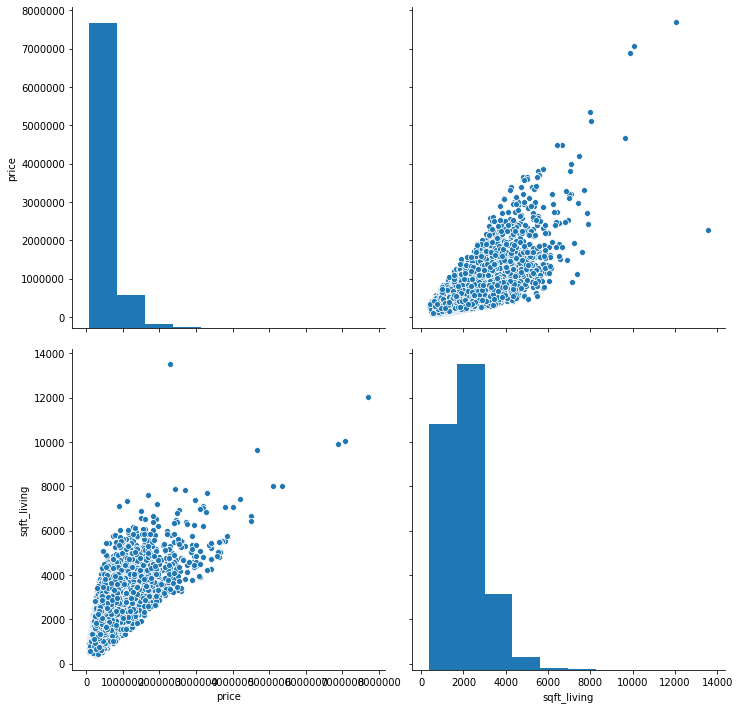

In [37]:
p = sns.pairplot(data[['price', 'sqft_living']], height = 5)

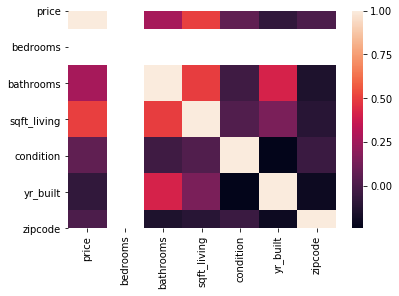

In [38]:
corr = data_bed_bath.corr()
sns.heatmap(corr)

In [39]:
data_bed_bath.describe()

,price,bedrooms,bathrooms,sqft_living,condition,yr_built,zipcode
count,1.748000e+03,1748.0,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000
mean,3.819078e+05,2.0,1.245995,1168.208238,3.410183,1949.669908,98107.719108
std,1.639594e+05,0.0,0.367522,376.536998,0.689648,28.848325,47.023792
min,8.250000e+04,2.0,0.500000,440.000000,1.000000,1900.000000,98001.000000
25%,2.600000e+05,2.0,1.000000,880.000000,3.000000,1927.000000,98074.000000
50%,3.600000e+05,2.0,1.000000,1090.000000,3.000000,1947.000000,98116.000000
75%,4.701125e+05,2.0,1.500000,1360.000000,4.000000,1960.000000,98133.000000
max,1.410000e+06,2.0,2.000000,3490.000000,5.000000,2014.000000,98199.000000


## Normalizing the Data##

In [46]:
def norm_feat(series):
    return(series-series.mean())/series.std()
for feat in ['bedrooms', 'bathrooms', 'sqft_living', 'condition', 'yr_built', 'zipcode']:
    data_bed_bath[feat] = norm_feat(data_bed_bath[feat])
data_bed_bath.describe()

,price,bedrooms,bathrooms,sqft_living,condition,yr_built,zipcode
count,1.748000e+03,0.0,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03
mean,3.819078e+05,NaN,-3.251912e-17,1.951147e-16,-1.382063e-16,2.422674e-15,3.753519e-14
std,1.639594e+05,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,8.250000e+04,NaN,-2.029796e+00,-1.933962e+00,-3.494801e+00,-1.721761e+00,-2.269470e+00
25%,2.600000e+05,NaN,-6.693346e-01,-7.654181e-01,-5.947715e-01,-7.858310e-01,-7.170648e-01
50%,3.600000e+05,NaN,-6.693346e-01,-2.077040e-01,-5.947715e-01,-9.254986e-02,1.761001e-01
75%,4.701125e+05,NaN,6.911269e-01,5.093570e-01,8.552432e-01,3.580829e-01,5.376192e-01
max,1.410000e+06,NaN,2.051588e+00,6.166172e+00,2.305258e+00,2.229942e+00,1.941164e+00


In [48]:
data_bed_bath.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition',
       'yr_built', 'zipcode'],
      dtype='object')

In [49]:
data_bed_bath.to_csv('data_2bed.csv', index = False) 